In [1]:
from UnionFind import *
from MatrixGraph import NonOrientedWeightedMatrixGraph as nwg

In [2]:
Arr = UnionFind(4)
Arr.show()

R:{0: 0, 1: 1, 2: 2, 3: 3}
List:{0: 0, 1: 1, 2: 2, 3: 3}
Next:{0: None, 1: None, 2: None, 3: None}
Size:{0: 1, 1: 1, 2: 1, 3: 1}
Internal:{0: 0, 1: 1, 2: 2, 3: 3}
External:{0: 0, 1: 1, 2: 2, 3: 3}


In [3]:
Arr.Union(1, 2)
Arr.show()

R:{0: 0, 1: 2, 2: 2, 3: 3}
List:{0: 0, 2: 1, 3: 3}
Next:{0: None, 1: 2, 2: None, 3: None}
Size:{0: 1, 2: 2, 3: 1}
Internal:{0: 0, 1: 2, 2: 2, 3: 3}
External:{0: 0, 1: 1, 2: 1, 3: 3}


In [4]:
Arr.MakeSet()
Arr.show()

R:{0: 0, 1: 2, 2: 2, 3: 3, 4: 4}
List:{0: 0, 2: 1, 3: 3, 4: 4}
Next:{0: None, 1: 2, 2: None, 3: None, 4: None}
Size:{0: 1, 2: 2, 3: 1, 4: 1}
Internal:{0: 0, 1: 2, 2: 2, 3: 3, 5: 4}
External:{0: 0, 1: 1, 2: 1, 3: 3, 4: 5}


In [5]:
Arr.Union(2, 4)
Arr.show()

R:{0: 0, 1: 2, 2: 2, 3: 3, 4: 2}
List:{0: 0, 2: 4, 3: 3}
Next:{0: None, 1: 2, 2: None, 3: None, 4: 1}
Size:{0: 1, 2: 3, 3: 1}
Internal:{0: 0, 1: 2, 2: 2, 3: 3, 5: 4}
External:{0: 0, 1: 1, 2: 2, 3: 3, 4: 5}


In [6]:
Graph = nwg(5)
Graph.model_Erdasha_Renya(0.8)
print(Graph)

[[inf, 7.387018068095571, 4.276339233098266, -7.281641761158979, 7.419897456969181]
 [7.387018068095571, inf, -3.740671886866971, 5.289325099767163, 4.350736804089099]
 [4.276339233098266, -3.740671886866971, inf, -9.169902295099124, -0.6051170393830567]
 [-7.281641761158979, 5.289325099767163, -9.169902295099124, inf, 0.5903382622468953]
 [7.419897456969181, 4.350736804089099, -0.6051170393830567, 0.5903382622468953, inf]]



In [7]:
def matrix2uvw(matrix):
    res = []
    len_matrix = len(matrix)
    for u in range(len_matrix):
        for v in range(len_matrix):
            res.append((u, v, matrix[u][v]))
    return res

In [8]:
print(matrix2uvw(Graph.matrix))

[(0, 0, inf), (0, 1, 7.387018068095571), (0, 2, 4.276339233098266), (0, 3, -7.281641761158979), (0, 4, 7.419897456969181), (1, 0, 7.387018068095571), (1, 1, inf), (1, 2, -3.740671886866971), (1, 3, 5.289325099767163), (1, 4, 4.350736804089099), (2, 0, 4.276339233098266), (2, 1, -3.740671886866971), (2, 2, inf), (2, 3, -9.169902295099124), (2, 4, -0.6051170393830567), (3, 0, -7.281641761158979), (3, 1, 5.289325099767163), (3, 2, -9.169902295099124), (3, 3, inf), (3, 4, 0.5903382622468953), (4, 0, 7.419897456969181), (4, 1, 4.350736804089099), (4, 2, -0.6051170393830567), (4, 3, 0.5903382622468953), (4, 4, inf)]


In [9]:
import time

def Kruskal(graph : nwg):
    V = graph.V
    edges = matrix2uvw(graph.matrix)

    edges.sort(key=lambda x: x[2])
    edges = edges[::2]

    mst = []

    UF = UnionFind(V)

    start_time = time.time()

    for u, v, w in edges:
        if UF.Find(u) != UF.Find(v):
            UF.Union(u, v)
            mst.append((u, v, w))

    return mst, time.time()-start_time

In [10]:
Kruskal(Graph)

([(2, 3, -9.169902295099124),
  (0, 3, -7.281641761158979),
  (1, 2, -3.740671886866971),
  (2, 4, -0.6051170393830567)],
 0.0)

In [11]:
def get_graphs(size_graphs: int, amount: int) -> list:
    graphs = [nwg(size_graphs) for _ in range(amount)]
    for g in graphs:
        g.model_Erdasha_Renya(0.8)
    return graphs

In [12]:
X = list(range(10, 1001, 100))
Y = []
for x in X:
    time_ = 0
    for g in get_graphs(x, 10):
        time_ += Kruskal(g)[1]
    Y.append(time_/10)
print(X)
print("------------------------")
print(Y)

[10, 110, 210, 310, 410, 510, 610, 710, 810, 910]
------------------------
[0.0, 0.0004988670349121094, 0.0022996902465820313, 0.005712890625, 0.014261269569396972, 0.037906765937805176, 0.05514364242553711, 0.09709641933441163, 0.11173665523529053, 0.12335789203643799]


Text(0, 0.5, 'Час виконання')

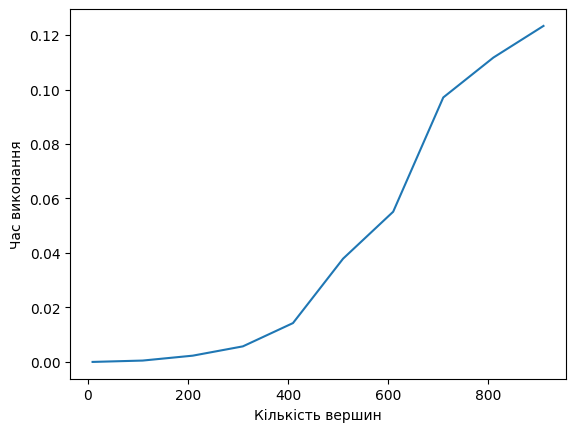

In [13]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.xlabel("Кількість вершин")
plt.ylabel("Час виконання")